In [ ]:
# ake tokinize into sentence 
# Tonkenize to words 
# Vectorize: tfidf, or count 
# Models: (LDA, LMF) = used for common [pyldaviz] used to fit and find topics / random forest 

# [pyldaviz] make cool viz from lda models 
# Train test before vectorizing
# Add vector text and df together

# Model can handle data that's different shape 

In [1]:
# Imports 
import pandas as pd
import nltk_helper as nh
import matplotlib.pyplot as plt
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.decomposition import NMF, LatentDirichletAllocation



In [2]:
# Get data 
books = pd.read_pickle('../data/books.pkl')
books.head()

,title,warning,summary,ch1,ch2,ch3,ch4,ch5
0,Beware Of Chicken,,Jin Rou wanted to be a cultivator who defie...,Beware of Chicken In which a transmigrator ...,I jolted awake to Big D’s furious battle cr...,Bi De knew fury. One of the red ones had ve...,There were many ways Meiling expected her d...,Jin surely could have left first thing in t...
1,The Perfect Run,,The Perfect Run is now available on Amazon ...,"It was May 8th, 2020 for the third time, an...",Ryan always did science in his underwear. C...,"As per the name, the Bakuto was a Japan-the...","It was May 10th, 2020 for the first time, a...",Bugs Bunny. The rabbit was Ryan’s most belo...
2,Kairos: A Greek Myth LitRPG,,It has been centuries since mortals unlocke...,"Kairos was coating his spear with poison, w...","It took three days, but home was within sig...","In the marshes north of Lissala, there was ...",When mortal heroes overthrew the old gods d...,The Foresight reached the island of Scheria...
3,Vigor Mortis,,In a world of sky islands orbiting around a...,"“Stop, thief!” I can’t help but wonder why ...",I sit in stunned silence for a short moment...,Maybe having parents isn’t all that great a...,"“All right, kiddo. How about you tell me th...",Oh no. Oh shit. Act natural. Just act natur...
4,A Journey of Black and Red,,Where am I? What is this! I... I don't reme...,"Where… where am I? I take a deep breath in,...",I seethe. The Asian man stares at me with a...,My best friend locks arms with me as we wal...,The last harmonies of the hymn wash over th...,"“Aunt Catherine!” “Ma petite chérie, I am s..."


In [3]:
# Prepair text 
def prep_text(text):
    words = nh.tokenize(text)
    words = nh.clean(words)
    return nh.stem_lem(words, True)

In [4]:
# Make a tifd vector
tfid = TfidfVectorizer(tokenizer = prep_text)
# Fit summary features 
tfid.fit(books.summary)
# Trasform and get features names
X = tfid.transform(books.summary)

/home/noel/anaconda3/lib/python3.8/site-packages/sklearn/feature_extraction/text.py:484: UserWarning: The parameter 'token_pattern' will not be used since 'tokenizer' is not None'
  warnings.warn("The parameter 'token_pattern' will not be used"


In [23]:
# 
def fit_nmf(data, n = 5, max_i = 500):
    nmf = NMF(n_components = n, max_iter = max_i)
    nmf.fit(data)
    W = nmf.transform(data)
    H = nmf.components_
    return nmf.reconstruction_err_

Text(0, 0.5, 'Reconstruction Errror')

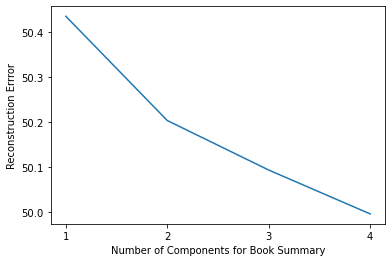

In [25]:
# Find the optimal number of components 
n = 5
error = [fit_nmf(X, n = i) for i in range(1,n)]
plt.plot(range(1,n), error)
plt.xticks(range(1, n))
plt.xlabel('Number of Components for Book Summary')
plt.ylabel('Reconstruction Errror')

In [38]:
# Make NMF model 
nmf_model = NMF(n_components = 3, random_state = 0)
W = nmf_model.fit_transform(X)
H = nmf_model.components_

In [33]:
books.head()

,title,warning,summary,ch1,ch2,ch3,ch4,ch5
0,Beware Of Chicken,,Jin Rou wanted to be a cultivator who defie...,Beware of Chicken In which a transmigrator ...,I jolted awake to Big D’s furious battle cr...,Bi De knew fury. One of the red ones had ve...,There were many ways Meiling expected her d...,Jin surely could have left first thing in t...
1,The Perfect Run,,The Perfect Run is now available on Amazon ...,"It was May 8th, 2020 for the third time, an...",Ryan always did science in his underwear. C...,"As per the name, the Bakuto was a Japan-the...","It was May 10th, 2020 for the first time, a...",Bugs Bunny. The rabbit was Ryan’s most belo...
2,Kairos: A Greek Myth LitRPG,,It has been centuries since mortals unlocke...,"Kairos was coating his spear with poison, w...","It took three days, but home was within sig...","In the marshes north of Lissala, there was ...",When mortal heroes overthrew the old gods d...,The Foresight reached the island of Scheria...
3,Vigor Mortis,,In a world of sky islands orbiting around a...,"“Stop, thief!” I can’t help but wonder why ...",I sit in stunned silence for a short moment...,Maybe having parents isn’t all that great a...,"“All right, kiddo. How about you tell me th...",Oh no. Oh shit. Act natural. Just act natur...
4,A Journey of Black and Red,,Where am I? What is this! I... I don't reme...,"Where… where am I? I take a deep breath in,...",I seethe. The Asian man stares at me with a...,My best friend locks arms with me as we wal...,The last harmonies of the hymn wash over th...,"“Aunt Catherine!” “Ma petite chérie, I am s..."


In [46]:
# X_df = pd.DataFrame(X, index = books.title, columns = tfid.get_feature_names())
df_W = pd.DataFrame(W, index = books.title)
df_H = pd.DataFrame(H, columns = tfid.get_feature_names())

In [42]:
df_H.T

,0,1,2
'',0.000000,0.0,0.447395
'ah,0.000927,0.0,0.000663
'an,0.001228,0.0,0.001452
'at,0.000000,0.0,0.002356
'automata,0.001445,0.0,0.000000
...,...,...,...
𝘸𝘪𝘵𝘩,0.001421,0.0,0.000000
𝘺𝘰𝘶,0.001421,0.0,0.000000
💙,0.000000,0.0,0.003367
😃,0.001176,0.0,0.000000


In [74]:
df_W

,0,1,2
title,,,
Beware Of Chicken,0.031581,0.000390,0.033722
The Perfect Run,0.051559,0.000000,0.037216
Kairos: A Greek Myth LitRPG,0.048676,0.000000,0.000000
Vigor Mortis,0.044563,0.000592,0.034511
A Journey of Black and Red,0.002349,0.000861,0.075478
...,...,...,...
Grand road,0.008550,0.000000,0.058984
Paper Aeroplanes,0.016035,0.000157,0.011076
Game Creator System,0.037699,0.000000,0.040271


In [75]:
# Top 5 books 
df_H.iloc[0].sort_values(ascending = False)[0:20]



world      0.912517
life       0.481982
new        0.470632
one        0.460996
power      0.429713
human      0.407210
magic      0.404052
find       0.340615
live       0.337527
's         0.296809
becom      0.275385
god        0.275016
year       0.245283
monster    0.244473
peopl      0.243452
surviv     0.243287
earth      0.228977
war        0.225849
would      0.223803
way        0.210732
Name: 0, dtype: float64

In [64]:
df_H['number']

0    0.026913
1    0.000000
2    0.022858
Name: number, dtype: float64

In [ ]:
df_H.iloc[1].sort_values(ascending=False).index[:20]

In [ ]:
tfid.get_feature_names()

In [ ]:
# nmf good for getting topic 
X2_argmax = np.argmax()